In [3]:
from collections import OrderedDict
from classes import *
%matplotlib inline

## Visualizing results of test experiments

In [1]:
!ls ../tmp/

20180411-11_mse_recorded.txt  best_mutations_increasing_block_repeats.txt
20180411-11_predictions.npy   best_mutations_increasing_scale.txt
20180411-1518		      best_mutations.txt
20180411-1530		      mse_recorded.txt
20180411-1538		      recorded_predictions_identical_NN.npy
20180411-15_mse_recorded.txt  recorded_predictions_increasing_block_repeats.npy
20180411-15_predictions.npy   recorded_predictions_increasing_scale.npy


In [9]:
experiment='20180411-15'

In [10]:
mse_train=list(pd.DataFrame.from_csv('../tmp/'+experiment+'_mse_recorded.txt',sep='\t').ix['Train'])
mse_val=list(pd.DataFrame.from_csv('../tmp/'+experiment+'_mse_recorded.txt',sep='\t').ix['Test'])

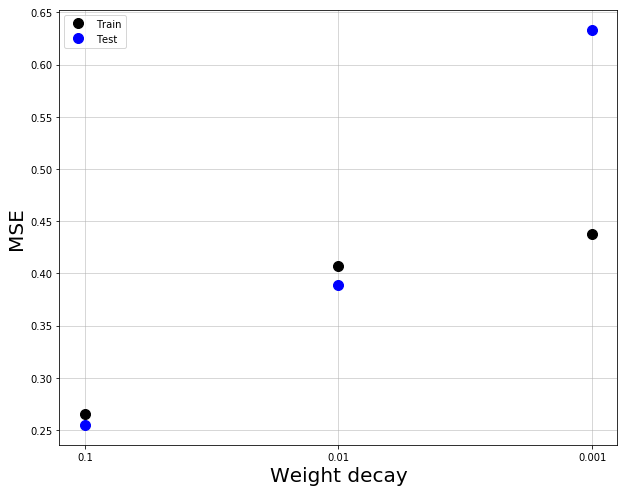

In [11]:
plt.figure(figsize=[10,8])
plt.plot([x for x in range(len(mse_train))],mse_train,'ok',label='Train',ms=10)
plt.plot([x for x in range(len(mse_val))],mse_val,'ob',label='Test',ms=10)
plt.ylabel('MSE',fontsize=20)
plt.xlabel('Weight decay',fontsize=20)
plt.legend()
plt.grid('k',lw=0.5)
plt.xticks([0,1,2],['0.1','0.01','0.001'])
plt.savefig('../figures/'+experiment+'_weight_decay.pdf');

## Extracting good mutations

In [2]:
wt_sq = 'MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLSYGVQCFSRYPDHMKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRAEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYIMADKQKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDHMVLLEFVTAAGITHGMDELYK'

In [3]:
f='./data/amino_acid_genotypes_to_brightness.txt'
batch_size,zero_sample_fraction = 200,0.5

input_data = Data(file_path=f,batch_size=batch_size,zero_sample_fraction=zero_sample_fraction, zeroing=True)

functions.py:87: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  labels=labels.reshape(-1,1)
functions.py:90: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  sample_weights=sample_weights.reshape(-1,1)
/nfs/scistore08/kondrgrp/eputints/.local/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [4]:
unique_mutations = []
for mut in input_data.mutant_list:
    unique_mutations.extend(mut)
    
unique_mutations = [[x] for x in set(unique_mutations)]

In [5]:
#start the list with a wild-type
sq_test_set = [wt_sq]

for mutant in unique_mutations:
    sq_test_set.append(make_mutant_sq(wt_sq, mutant))

In [6]:
#creating the initial 0-filled carcas of unfolded versions of sqs, which will be further turned into binary matricies of shape 238 by 20 (aas)
unfolded_df = OrderedDict()

for aa in set([item[-1] for sublist in unique_mutations for item in sublist]):
    unfolded_df[aa] = np.zeros((len(sq_test_set), len(wt_sq)))

#filling the binary matrices, corresponding to 20 different amino acids within the unfoded_df dict

for ind,mutant in enumerate(sq_test_set):
    for pos,mut in enumerate(mutant):
        unfolded_df[mut][ind, pos] = 1.

In [7]:
#stacking all the amino acids into one np array
input_df = np.stack(unfolded_df.values(),axis=1)

#putting the channel info (amino acids) to the end
input_df = np.swapaxes(input_df,-1,-2)

In [8]:
a = np.load('../tmp/'+experiment+'_predictions.npy')

In [23]:
f = open('../tmp/'+experiment+'_best_predicted_mutations.txt','w') 
f.write('Mutation\tTimesPredicted\tTrueBrightness\tStD\tUniqueBarcodes\n')

for i in range(len(unique_mutations)):
    test = sum(a[i+1])
    if test>=8 and len(input_data.initial_df[input_data.initial_df['aaMutations'] == 'S'+unique_mutations[i][0]])>0:
        print (unique_mutations[i][0]+'\t'+str(test)+'\t'+str(float(input_data.initial_df['medianBrightness'][input_data.initial_df['aaMutations'] == 'S'+unique_mutations[i][0]]))+'\t'+str(float(input_data.initial_df['std'][input_data.initial_df['aaMutations'] == 'S'+unique_mutations[i][0]]))+'\t'+str(float(input_data.initial_df['uniqueBarcodes'][input_data.initial_df['aaMutations'] == 'S'+unique_mutations[i][0]]))+'\n')
        f.write(unique_mutations[i][0]+'\t'+str(test)+'\t'+str(float(input_data.initial_df['medianBrightness'][input_data.initial_df['aaMutations'] == 'S'+unique_mutations[i][0]]))+'\t'+str(float(input_data.initial_df['std'][input_data.initial_df['aaMutations'] == 'S'+unique_mutations[i][0]]))+'\t'+str(float(input_data.initial_df['uniqueBarcodes'][input_data.initial_df['aaMutations'] == 'S'+unique_mutations[i][0]]))+'\n')
    
    elif test>=8 and len(input_data.initial_df[input_data.initial_df['aaMutations'] == 'S'+unique_mutations[i][0]])==0:
        print unique_mutations[i][0], test
    
f.close()

K1T	8.0	3.62977520434	0.0648078069455	2.0

T60S	8.0	3.76956207394	0.149814676718	11.0

I169H 8.0
I169V	8.0	3.73328176752	0.134486394974	25.0

I169S	8.0	3.79803541758	0.0432742939777	4.0

N210D	8.0	3.72106800103	0.0815761600693	18.0

K164E	8.0	3.74106939897	0.096936995744	32.0

K164N	8.0	3.72589521566	nan	1.0

I45V	8.0	3.77142177416	0.0876062093054	31.0

S173N	8.0	3.65267676782	0.0882553621266	3.0

S173G	9.0	3.75204274795	0.0954394777939	42.0

N162F 8.0
Y37S	8.0	3.85008641169	0.127413785544	2.0

Y235S 8.0
Y235D	8.0	3.75410080307	nan	1.0

K160G 8.0
A204T	8.0	3.81968408211	0.117514219338	3.0

H229L	8.0	3.67780487734	0.0888658082777	9.0

K212M	8.0	3.67766456215	0.116066304645	12.0

M231T	8.0	3.73130180581	0.0908269080725	27.0

K156M	8.0	3.72514961562	0.0816103311009	16.0

T7N 8.0
L234V	8.0	3.69366814543	0.0499395372263	3.0

K99E	10.0	3.71281118421	0.0866635653956	35.0

E233A	8.0	3.63512169662	nan	1.0

E233D	8.0	3.5195049389	nan	1.0

D127G	8.0	3.80426995512	0.0930126084003	28.0

V161A	10.0	